[View in Colaboratory](https://colab.research.google.com/github/MariamMohamedFawzy/Deep-Learning-Notebooks/blob/master/CNN_Transformation_Effect.ipynb)

**Import Libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

**Prepare the dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [86]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
def shift_image(image, quadrant_number):
  assert quadrant_number in [1, 2, 3, 4], "quadrant number should be one of these values [1, 2, 3, 4]"
  rows, cols = image.shape
  image = cv2.resize(image, (int(rows/2), int(cols/2)))
  new_image = np.zeros((rows, cols))
  if quadrant_number == 1:
    new_image[:int(rows/2), int(cols/2):] = image
  elif quadrant_number == 2:
    new_image[:int(rows/2), :int(cols/2)] = image
  elif quadrant_number == 3:
    new_image[int(rows/2):, :int(cols/2)] = image
  else:
    new_image[int(rows/2):, int(cols/2):] = image
  
  return new_image

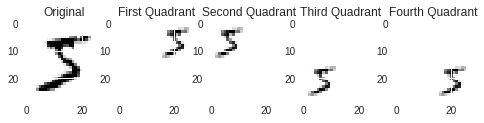

In [88]:
image = x_train[0]
new_image_1 = shift_image(image, 1)
new_image_2 = shift_image(image, 2)
new_image_3 = shift_image(image, 3)
new_image_4 = shift_image(image, 4)

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.imshow(image)
ax1.set_title('Original')
ax2.imshow(new_image_1)
ax2.set_title('First Quadrant')
ax3.imshow(new_image_2)
ax3.set_title('Second Quadrant')
ax4.imshow(new_image_3)
ax4.set_title('Third Quadrant')
ax5.imshow(new_image_4)
ax5.set_title('Fourth Quadrant')
plt.show()

**I will shift all the digits in train and test sets to the second quadrant**

In [0]:
x_train_sec = np.array(list(map(lambda x: shift_image(x, 2), x_train)))
x_test_sec = np.array(list(map(lambda x: shift_image(x, 2), x_test)))

In [0]:
x_train_sec = x_train_sec.astype('float')
x_test_sec = x_test_sec.astype('float')

In [0]:
x_train_sec = x_train_sec / 255.
x_test_sec = x_test_sec / 255.

In [92]:
print(K.image_data_format())

channels_last


In [0]:
x_train_sec = x_train_sec.reshape(-1, 28, 28, 1)
x_test_sec = x_test_sec.reshape(-1, 28, 28, 1)

In [0]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [0]:
def prepare_x_test(quadrant_num):
  x_test_quad = np.array(list(map(lambda x: shift_image(x, quadrant_num), x_test)))
  x_test_quad = x_test_quad.astype('float')
  x_test_quad = x_test_quad / 255.
  x_test_quad = x_test_quad.reshape(-1, 28, 28, 1)
  return x_test_quad

In [0]:
x_test_first = prepare_x_test(1)

**Create the model**

In [0]:
class Model(object):
  
  def __init__(self, num_classes, *input_shape):
    self.model = None
    self.input_shape = input_shape[0]
    self.num_classes = num_classes
  
  def create_model(self, use_fully_connected=True):
    self.model = Sequential()
    self.model.add(Conv2D(64, (3, 3), activation='relu', input_shape=self.input_shape))
    self.model.add(Conv2D(32, (3, 3), activation='relu'))
    self.model.add(MaxPooling2D((2, 2)))
    if use_fully_connected:
      self.model.add(Flatten())
      self.model.add(Dense(128, activation='relu'))
      self.model.add(Dense(self.num_classes, activation='softmax'))
    else:
      self.model.add(Conv2D(16, (3, 3), activation='relu'))
      self.model.add(Flatten())
      self.model.add(Dense(self.num_classes, activation='softmax'))
    
  def compile(self):
    self.model.compile(loss=keras.losses.categorical_crossentropy,
                        optimizer=keras.optimizers.Adadelta(),
                        metrics=['accuracy'])
  
  def train(self, train_x, train_y, num_epochs, batch_size):
    self.model.fit(train_x, train_y, verbose=1, epochs=num_epochs, batch_size=batch_size)
    
  def test(self, test_x, test_y):
    return self.model.evaluate(test_x, test_y)

In [0]:
model_with_fully_connected = Model(10, (28, 28, 1))
model_with_fully_connected.create_model()

In [0]:
model_with_fully_connected.compile()

In [100]:
model_with_fully_connected.train(x_train_sec, y_train, 12, 128)

Epoch 1/12
60000/60000 [==============================] - 8s 137us/step - loss: 0.2491 - acc: 0.9238
Epoch 2/12
60000/60000 [==============================] - 8s 129us/step - loss: 0.0612 - acc: 0.9809
Epoch 3/12
60000/60000 [==============================] - 8s 129us/step - loss: 0.0442 - acc: 0.9862
Epoch 4/12
25216/60000 [===========>..................] - ETA: 4s - loss: 0.0318 - acc: 0.9897

60000/60000 [==============================] - 8s 129us/step - loss: 0.0336 - acc: 0.9894
Epoch 5/12
60000/60000 [==============================] - 8s 129us/step - loss: 0.0284 - acc: 0.9910
Epoch 6/12
60000/60000 [==============================] - 8s 129us/step - loss: 0.0230 - acc: 0.9925
Epoch 7/12
36864/60000 [=================>............] - ETA: 2s - loss: 0.0176 - acc: 0.9946

60000/60000 [==============================] - 8s 129us/step - loss: 0.0186 - acc: 0.9941
Epoch 8/12
60000/60000 [==============================] - 8s 130us/step - loss: 0.0158 - acc: 0.9948
Epoch 9/12
60000/60000 [==============================] - 8s 129us/step - loss: 0.0130 - acc: 0.9959
Epoch 10/12
37120/60000 [=================>............] - ETA: 2s - loss: 0.0104 - acc: 0.9972

60000/60000 [==============================] - 8s 129us/step - loss: 0.0107 - acc: 0.9969
Epoch 11/12
60000/60000 [==============================] - 8s 129us/step - loss: 0.0091 - acc: 0.9972
Epoch 12/12
60000/60000 [==============================] - 8s 129us/step - loss: 0.0075 - acc: 0.9979


In [101]:
model_with_fully_connected.test(x_test_sec, y_test)

10000/10000 [==============================] - 1s 124us/step


[0.033294254000756654, 0.991]

In [102]:
model_with_fully_connected.test(x_test_first, y_test)

10000/10000 [==============================] - 1s 127us/step


[3.0110642429351806, 0.0935]

In [0]:
model_without_fully_connected = Model(10, (28, 28, 1))
model_without_fully_connected.create_model(False)

In [0]:
model_without_fully_connected.compile()

In [105]:
model_without_fully_connected.train(x_train_sec, y_train, 12, 128)

Epoch 1/12
60000/60000 [==============================] - 8s 137us/step - loss: 0.3060 - acc: 0.9038
Epoch 2/12
60000/60000 [==============================] - 8s 130us/step - loss: 0.0848 - acc: 0.9742
Epoch 3/12
60000/60000 [==============================] - 8s 129us/step - loss: 0.0633 - acc: 0.9807
Epoch 4/12
21504/60000 [=========>....................] - ETA: 4s - loss: 0.0540 - acc: 0.9829

60000/60000 [==============================] - 8s 130us/step - loss: 0.0521 - acc: 0.9841
Epoch 5/12
60000/60000 [==============================] - 8s 130us/step - loss: 0.0452 - acc: 0.9857
Epoch 6/12
60000/60000 [==============================] - 8s 130us/step - loss: 0.0387 - acc: 0.9881
Epoch 7/12
33408/60000 [===============>..............] - ETA: 3s - loss: 0.0353 - acc: 0.9891

60000/60000 [==============================] - 8s 130us/step - loss: 0.0346 - acc: 0.9895
Epoch 8/12
60000/60000 [==============================] - 8s 130us/step - loss: 0.0310 - acc: 0.9901
Epoch 9/12
60000/60000 [==============================] - 8s 130us/step - loss: 0.0277 - acc: 0.9913
Epoch 10/12
34048/60000 [================>.............] - ETA: 3s - loss: 0.0248 - acc: 0.9922

60000/60000 [==============================] - 8s 130us/step - loss: 0.0259 - acc: 0.9921
Epoch 11/12
60000/60000 [==============================] - 8s 130us/step - loss: 0.0236 - acc: 0.9926
Epoch 12/12
60000/60000 [==============================] - 8s 130us/step - loss: 0.0221 - acc: 0.9932


In [106]:
model_without_fully_connected.test(x_test_sec, y_test)

10000/10000 [==============================] - 1s 115us/step


[0.03370177196036093, 0.9888]

In [107]:
model_without_fully_connected.test(x_test_first, y_test)

10000/10000 [==============================] - 1s 114us/step


[5.582514864349365, 0.0152]